In [1]:
import os
import sys
src_path = os.path.join(os.curdir, "..")
sys.path.append(os.path.normpath(src_path))

In [2]:
import torch
import numpy as np
import pytorch_lightning as pl
from PIL import Image
from matplotlib import pyplot as plt
from torch.nn import functional as F
from torchvision.transforms import Compose, Resize, Normalize, ToTensor
from src.models.segmentation import SegmentationUnet
from src.data.segmentation_loader import SegmentationLoader
from src.models.utils import DiceBCELoss, DiceCoefficient

In [3]:
transforms = Compose([
    Resize(size=(512, 512)),
    ToTensor()
])
image_transforms = Compose([
    Resize(size=(512, 512)),
    ToTensor(),
    Normalize((0.4828,), (0.2488,))
])

In [4]:
images_dir = os.path.join(src_path, "data", "processed", "test", "images")
masks_dir = os.path.join(src_path, "data", "processed", "test", "masks")

In [5]:
sample_name = "0_test_1_.png"

In [6]:
image_path = os.path.join(images_dir, sample_name)
mask_path = os.path.join(masks_dir, sample_name)

In [7]:
image = image_transforms(Image.open(image_path)).unsqueeze(0)
mask = transforms(Image.open(mask_path)).unsqueeze(0)

In [8]:
image.shape, mask.shape

(torch.Size([1, 1, 512, 512]), torch.Size([1, 1, 512, 512]))

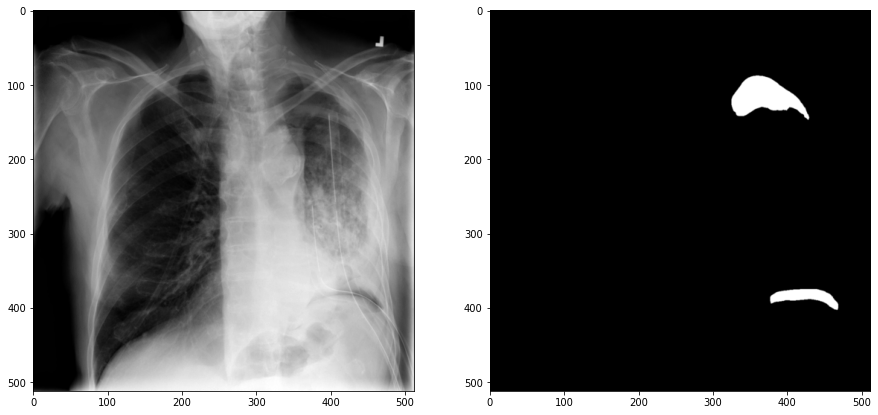

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 12))

ax1.imshow(image[0, 0, :, :], cmap="gray")
ax2.imshow(mask[0, 0, :, :], cmap="gray")
fig.show()

In [10]:
unet = SegmentationUnet()

In [11]:
output = torch.sigmoid(unet(image))

In [12]:
output.shape, mask.shape

(torch.Size([1, 1, 512, 512]), torch.Size([1, 1, 512, 512]))

In [13]:
criterion = torch.nn.BCELoss()

In [ ]:
criterion(output, mask)

tensor(0.9867, grad_fn=<BinaryCrossEntropyBackward>)

In [ ]:
mask.unique()

In [ ]:
plt.imshow(output[0, 0].detach(), cmap="gray")

In [ ]:
dicebce = DiceBCELoss()

In [ ]:
dice_coeff = DiceCoefficient()

In [ ]:
new_mask = torch.where(mask > 0, 1, 0).float()

In [ ]:
dice_coeff(new_mask, new_mask)

In [ ]:
dicebce(new_mask, new_mask)

In [ ]:
dicebce(output, new_mask)

In [ ]:
dice_coeff(output, mask)